* 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 지수 분포
      - 정규 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
* 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from scipy.stats import *
import seaborn as sns
plt.rc("font", family="Noto Sans KR", size=13)
plt.rc("figure", figsize=(10,7))

# 연속형 확률변수
## 정규분포

### 평균 이동

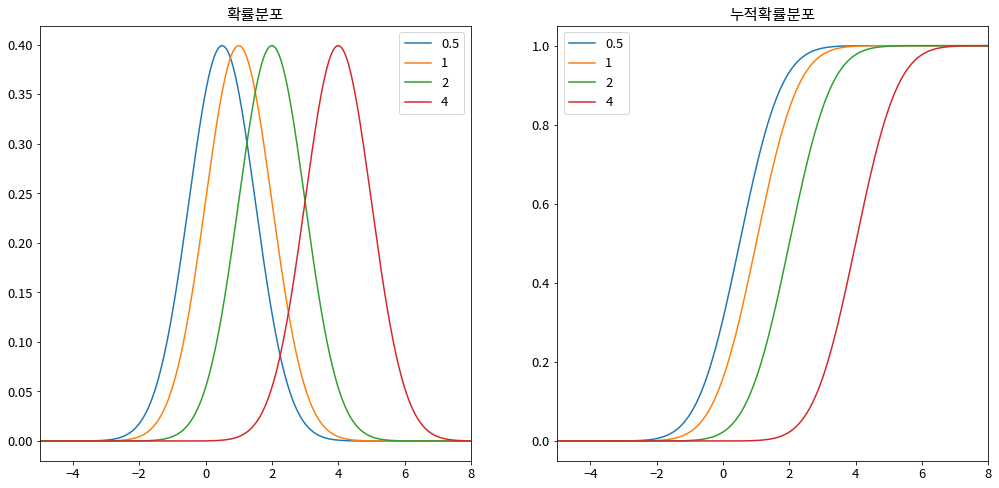

In [2]:
mus = [0.5, 1, 2, 4]  # 평균 list
std = 1 # 표준편차 1 고정
X = np.linspace(-10,10, 1000) # 범위

fig, axes = plt.subplots(1,2, figsize=(17,8)) # 플롯 2개를 담을 도화지

for mu in mus:
    norm = sp.stats.norm(mu, std) # 정규분포
    
    P_X = norm.pdf(X) # 정규분포의 확률분포
    F_X = norm.cdf(X) # 정규분포의 누적확률분포
    
    # 플롯
    axes[0].plot(X, P_X)
    axes[1].plot(X, F_X)
    
    # x 축
    axes[0].set_xlim(-5,8) 
    axes[1].set_xlim(-5,8)

# 타이틀
axes[0].set_title("확률분포")
axes[1].set_title("누적확률분포")

# 범례
axes[0].legend(mus)
axes[1].legend(mus)

### 표준편차 이동

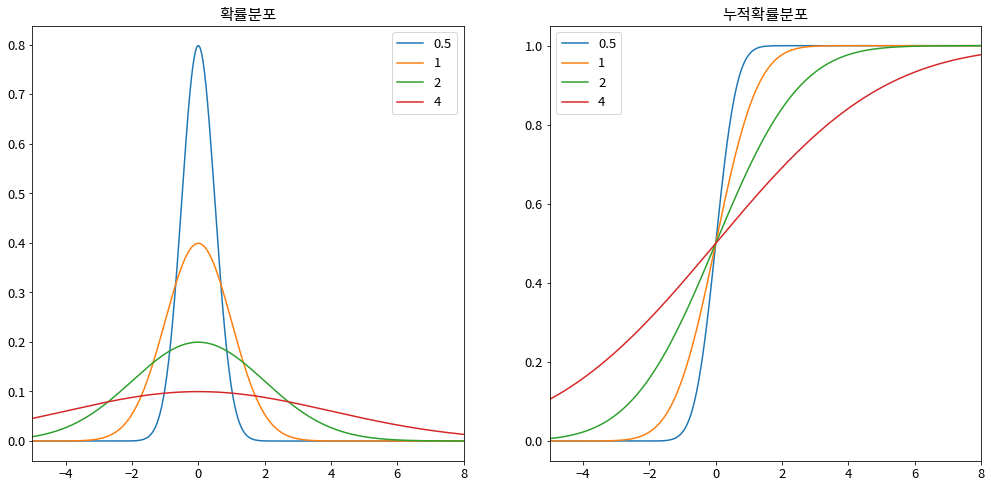

In [3]:
mu = 0
stds = [0.5,1,2,4]

X = np.linspace(-10,10, 1000)

fig, axes = plt.subplots(1,2, figsize=(17,8))
for std in stds:
    norm = sp.stats.norm(mu, std)
    P_X = norm.pdf(X)
    F_X = norm.cdf(X)
    axes[0].plot(X, P_X)
    axes[1].plot(X, F_X)

    axes[0].set_xlim(-5,8)
    axes[1].set_xlim(-5,8)

axes[0].set_title("확률분포")
axes[1].set_title("누적확률분포")    
axes[0].legend(stds)
axes[1].legend(stds)

### 예제
성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 확률분포, 누적확률분포, 1000명을 표본으로 히스토그램을 작성

Text(0.5, 1.0, 'c.d.f')

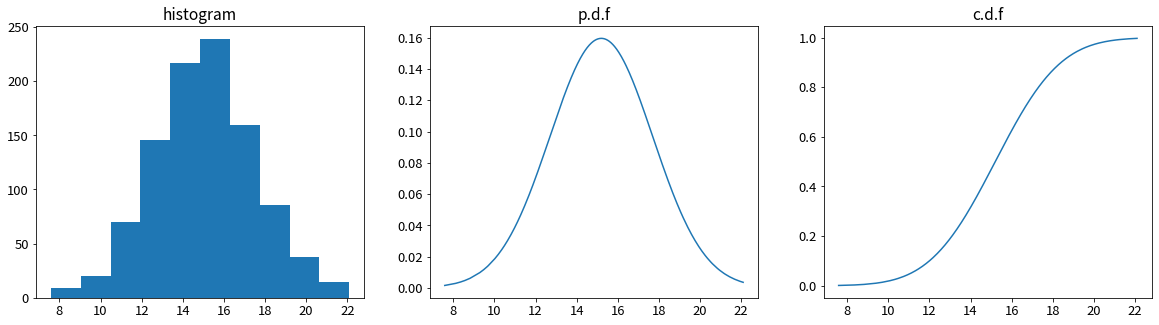

In [4]:
# 평균, 표준편차
mu = 15.2
std = 2.5

# 확률 함수 생성
norm = sp.stats.norm(mu, std)

# 표본추출
rvs = norm.rvs(1000, random_state=0)
rvs.sort()

# 도화지(틀) 생성
fig, axes = plt.subplots(1,3, figsize=(20,5))

P_X = norm.pdf(rvs)
F_X = norm.cdf(rvs)

axes[0].hist(rvs)
axes[1].plot(rvs, P_X)
axes[2].plot(rvs, F_X)

axes[0].set_title("histogram")
axes[1].set_title("p.d.f")
axes[2].set_title("c.d.f")

## 카이제곱 분포

### 자유도 변경

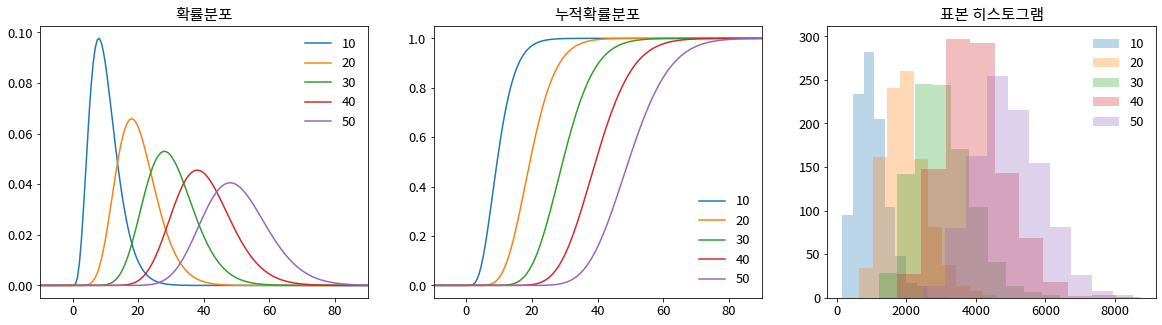

In [5]:
dfs = [10,20,30,40,50] # 자유도
x = np.linspace(-90,90, 300) # input 범위

# 도화지 객체
fig, axes = plt.subplots(1,3, figsize=(20,5))

# 자유도 별 그래프 그리기
for df in dfs:
    # 표본 추출
    rvs = chi2.rvs(df, loc=0, scale=100, size=1000, random_state=None)
    # 플롯
    axes[0].plot(x, chi2.pdf(x, df), label=f'{df}')
    axes[1].plot(x,chi2.cdf(x, df, scale=1), label=f'{df}')
    axes[2].hist(rvs, label=f"{df}", alpha=0.3)

# 타이틀, 축, 범례
axes[0].set_title("확률분포")
axes[1].set_title("누적확률분포")
axes[2].set_title("표본 히스토그램")    
axes[0].set_xlim(-10,90)
axes[1].set_xlim(-10,90)
axes[0].legend(loc='best', frameon=False)
axes[1].legend(loc='best', frameon=False)
axes[2].legend(loc='best', frameon=False)

## 감마분포

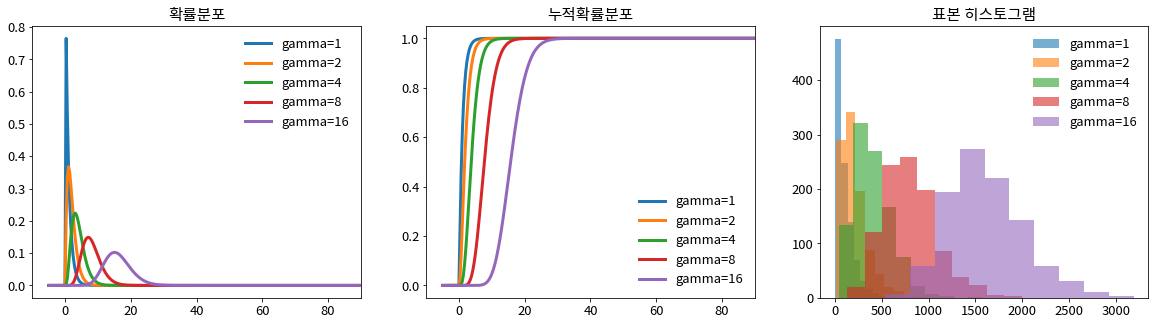

In [6]:
A = [1,2,4,8,16] 
x = np.linspace(-5,100, 300)

# 도화지 객체
fig, axes = plt.subplots(1,3, figsize=(20,5))

# 자유도 별 그래프 그리기
for a in A:
    # 표본 추출
    rvs = gamma.rvs(a, loc=0, scale=100, size=1000, random_state=None)
    # 플롯
    axes[0].plot(x, gamma.pdf(x, a), lw=3, label=f'gamma={a}')
    axes[1].plot(x, gamma.cdf(x, a), lw=3, label=f'gamma={a}')
    axes[2].hist(rvs, label=f'gamma={a}', alpha=0.6)

# 타이틀, 축, 범례
axes[0].set_title("확률분포")
axes[1].set_title("누적확률분포")
axes[2].set_title("표본 히스토그램")    
axes[0].set_xlim(-10,90)
axes[1].set_xlim(-10,90)
axes[0].legend(loc='best', frameon=False)
axes[1].legend(loc='best', frameon=False)
axes[2].legend(loc='best', frameon=False)

## 지수 분포

### 지수분포 - exponnorm

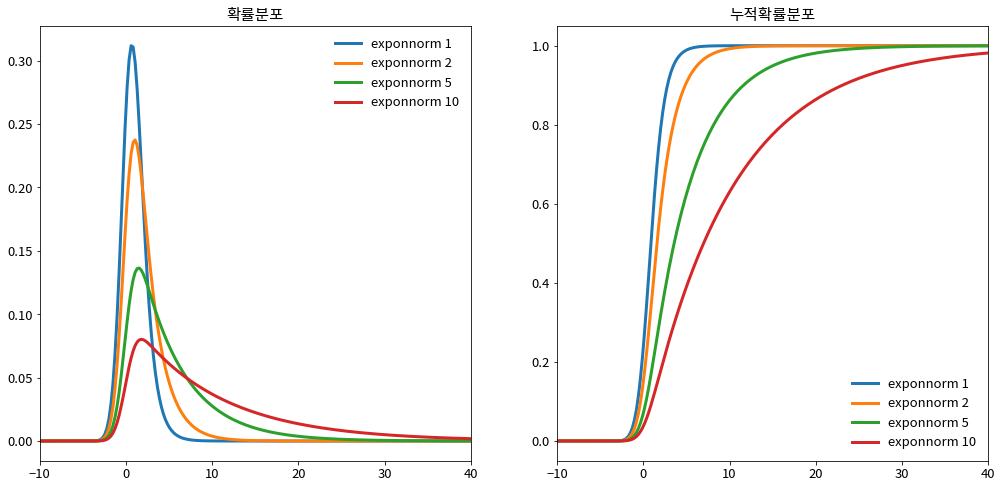

In [7]:
K = [1,2,5,10]
x = np.linspace(-20,50,300)

fig, axes = plt.subplots(1,2, figsize=(17,8))

for k in K:
    axes[0].plot(x, exponnorm.pdf(x, k), lw=3, label=f'exponnorm {k}')
    axes[1].plot(x, exponnorm.cdf(x, k), lw=3, label=f'exponnorm {k}')

    axes[0].set_xlim(-10,40)
    axes[1].set_xlim(-10,40)

axes[0].set_title("확률분포")
axes[1].set_title("누적확률분포")    
axes[0].legend(loc='best', frameon=False)
axes[1].legend(loc='best', frameon=False)

### 지수분포 -  exponpow

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_continuous_distns.py:1783: RuntimeWarning: overflow encountered in exp
  f = 1 + np.log(b) + sc.xlogy(b - 1.0, x) + xb - np.exp(xb)


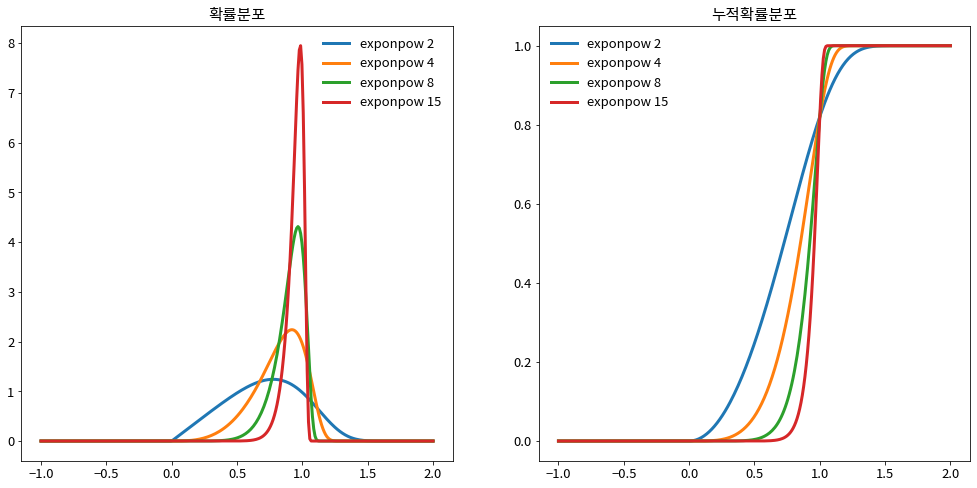

In [8]:
x = np.linspace(-1,2,300)
B = [2,4,8,15]

fig, axes = plt.subplots(1,2, figsize=(17,8))

for b in B:
    axes[0].plot(x, exponpow.pdf(x, b), lw=3, label=f'exponpow {b}')
    axes[1].plot(x, exponpow.cdf(x, b), lw=3, label=f'exponpow {b}')

axes[0].set_title("확률분포")
axes[1].set_title("누적확률분포")    
axes[0].legend(loc='best', frameon=False)
axes[1].legend(loc='best', frameon=False)

## 베타 분포

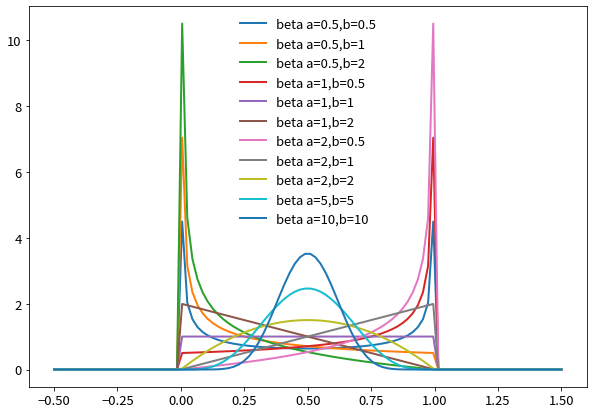

In [9]:
A = [0.5,1,2]
B = [0.5,1,2]
x = np.linspace(-0.5,1.5,100)

fig, ax = plt.subplots(1, 1)
for a in A:
    for b in B:
        ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
        
a=b=5
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=b=10
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
ax.legend(loc='best', frameon=False)

### α,β가 모두 1보다 클 때

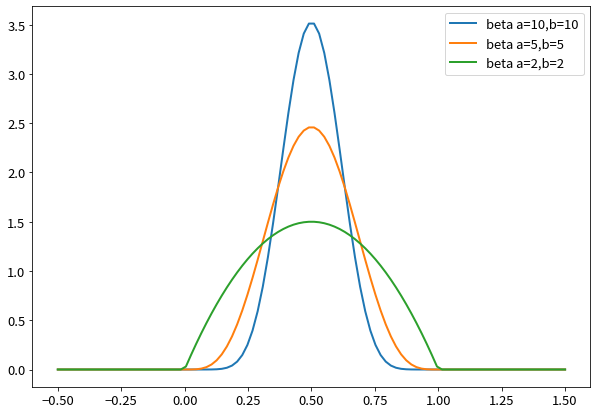

In [10]:
fig, ax = plt.subplots(1, 1)
a=b=10
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=b=5
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=b=2
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
ax.legend()

### α,β 중 하나 이상이 1일 때

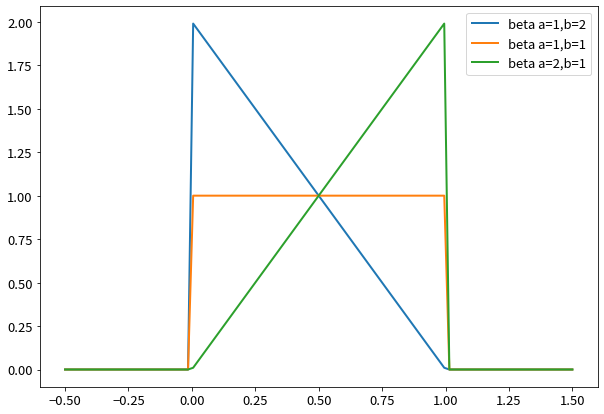

In [11]:
fig, ax = plt.subplots(1, 1)
a=1;b=2
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=1;b=1
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=2;b=1
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
ax.legend()

### α,β가 모두 1보다 작을 때

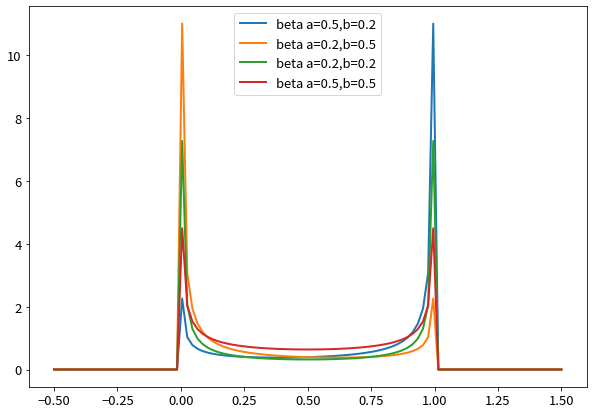

In [12]:
fig, ax = plt.subplots(1, 1)
a=0.5;b=0.2
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=0.2;b=0.5
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=0.2;b=0.2
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
a=0.5;b=0.5
ax.plot(x, beta.pdf(x, a, b),lw=2, label=f'beta a={a},b={b}')
ax.legend()

# 이산형 확률변수

## 베르누이 분포

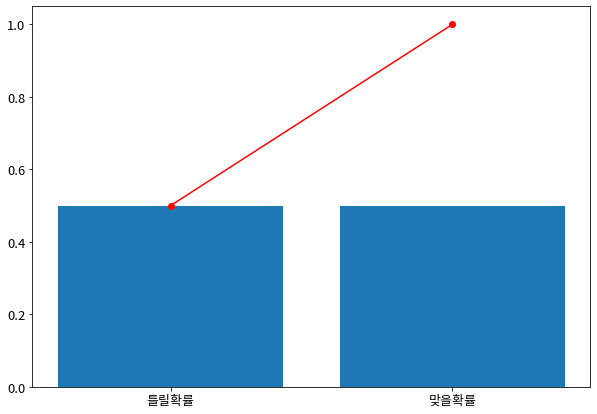

In [13]:
p = 0.5 # 확률
x = [0,1] # 틀리거나 , 맞거나
label = ["틀릴확률", "맞을확률"]

# 확률분포
plt.bar(x, bernoulli.pmf(x, p))
plt.xticks(x, labels=label)

# 누적확률분포
plt.plot(x,  bernoulli.cdf(x,p), marker="o", color = "r",  label="누적확률분포")

### 예제

- 주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

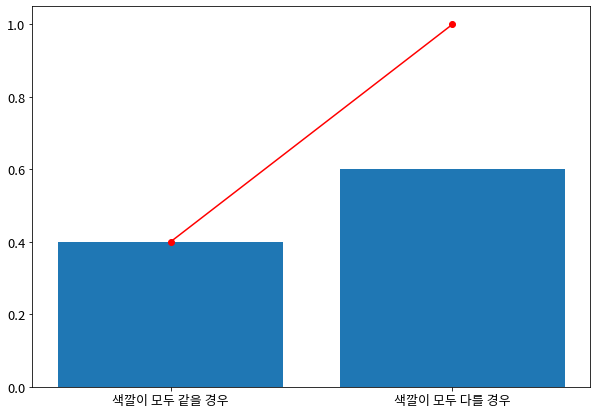

In [14]:
# 1C3 * 1C2 / 2C5
p = (3*2)/(5*4/2*1)
label = ["색깔이 모두 같을 경우", "색깔이 모두 다를 경우"]
x = [0,1]
plt.bar(x, bernoulli.pmf(x, p))
plt.xticks(x, labels=label)

plt.plot(x,  bernoulli.cdf(x,p), marker="o", color = "r",  label="누적확률함수")

## 이항분포

- 베르누이 실행을 N번 한 결과의 확률

In [ ]:
binom.dist(2,100,0.01,0)

In [15]:
# 이항분포의 확률분포, 누적확률분포 그리기
def binom_plot(N,mu):

    N=N # 시행횟수
    mu = mu # 확률
    
    x = np.arange(N+1) # x축
    label = [str(i)+"번" for i in x] # x축 레이블
    
    fig, ax = plt.subplots(1, 1) # 도화지
    
    plt.bar(x,binom.pmf(x, N, mu), label="확률 분포") # 확률분포 그래프
    plt.xticks(x, labels=label) # x 축 레이블
    plt.plot(x,  binom.cdf(x, N, mu), marker="o", color = "r",  label="누적확률분포") # 누적확률분포 그래프
    
    plt.tick_params(axis="x", labelrotation=90)  # x축 90도 회전
    plt.legend()

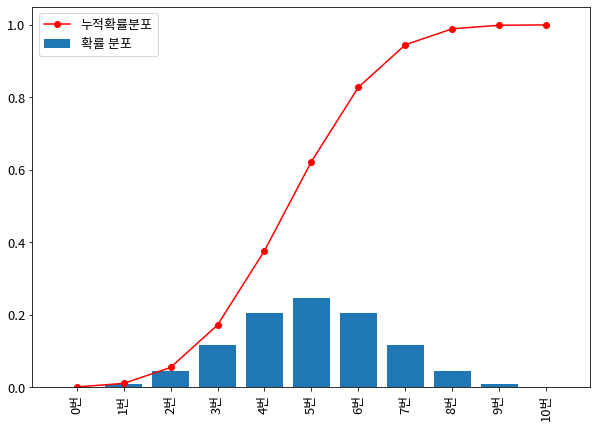

In [16]:
# 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포
binom_plot(10,0.5)

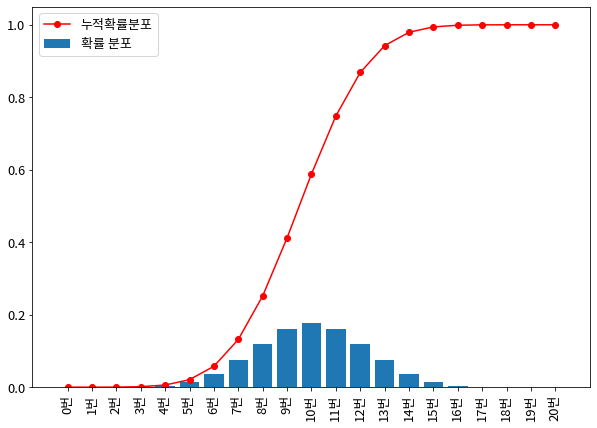

In [17]:
# 주사위를 20번 던져서 짝수가 나온 횟수의 분포
binom_plot(20,0.5)

## 카테고리 확률분포

- multinomial(N, mu)
- x= [1,0,0,…,0]
- N 번시행
- mu : 확률 벡터
- x 안의 값의 합이 N 이 어야한다.
- mu : 벡터의 합은 1

In [18]:
# 확률 객체 생성
mult = sp.stats.multinomial(8, [0.3,0.2,0.5])

# 표본추출
mult.rvs(10) # 각 벡터의 합은 8인것을 확인할 수 있다.

array([[4, 1, 3],
       [3, 3, 2],
       [1, 2, 5],
       [4, 2, 2],
       [2, 3, 3],
       [4, 2, 2],
       [2, 2, 4],
       [3, 1, 4],
       [2, 2, 4],
       [4, 1, 3]])

In [19]:
# N = 1 일때 확률분포 그래프 그리기
def mult_plot(N,mu,px):
    mult = sp.stats.multinomial(1, mu)
    x=[]
    ex = np.zeros(N)
    for i in range(N):
        ex[i] = 1
        x.append(ex)
        ex = np.zeros(N)
    plt.bar(px,mult.pmf(x))

### 예제 
- 주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

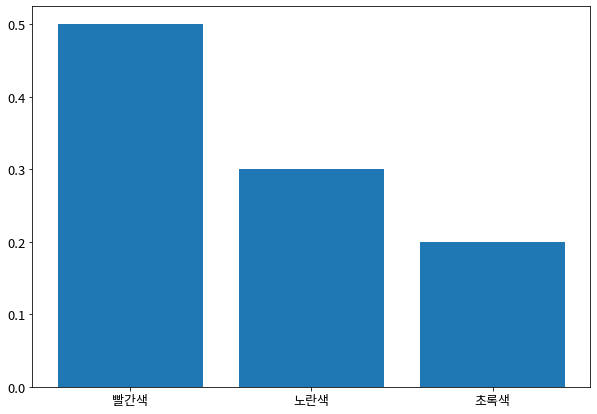

In [20]:
mult_plot(3,[5/10,3/10,2/10],["빨간색","노란색","초록색"])